In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("hotel_bookings.csv")

 # Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [43]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


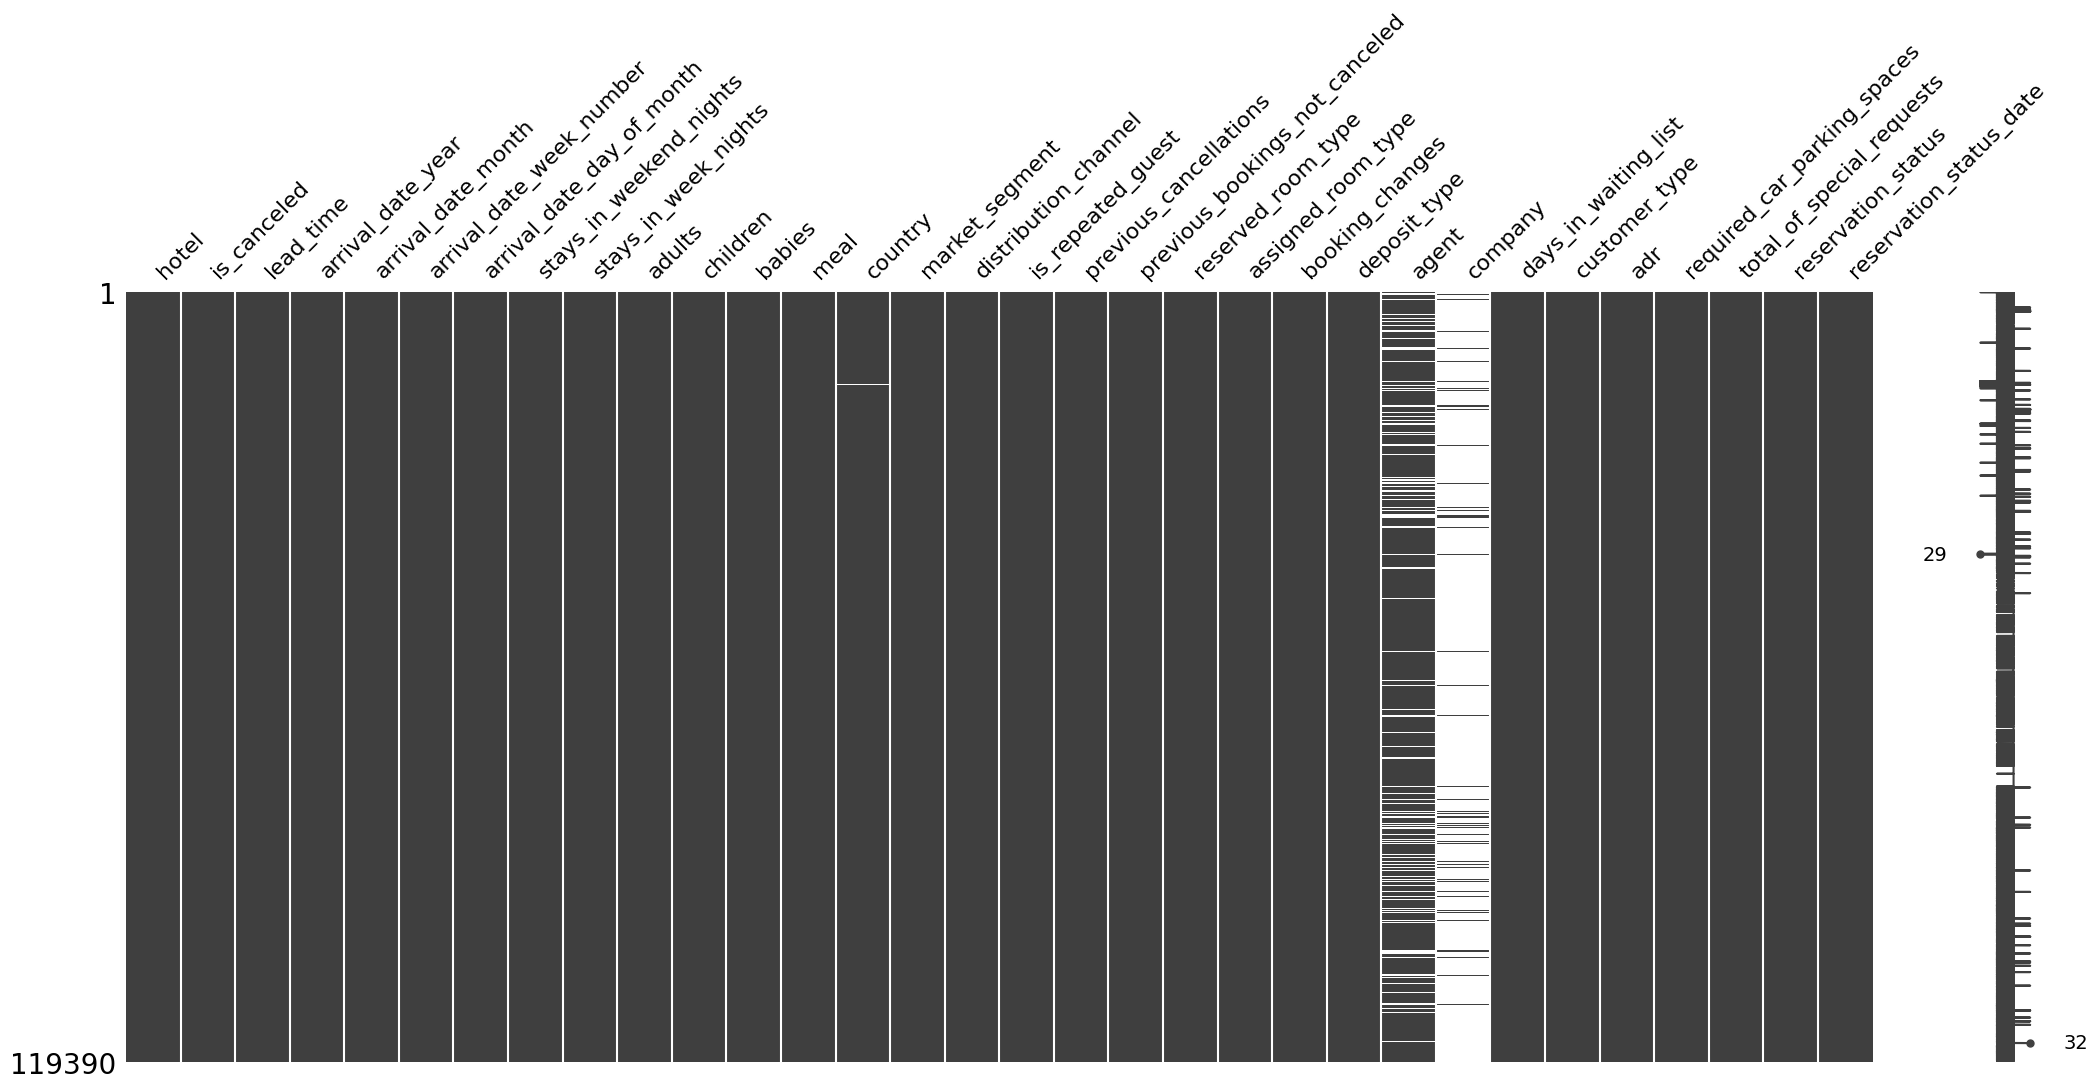

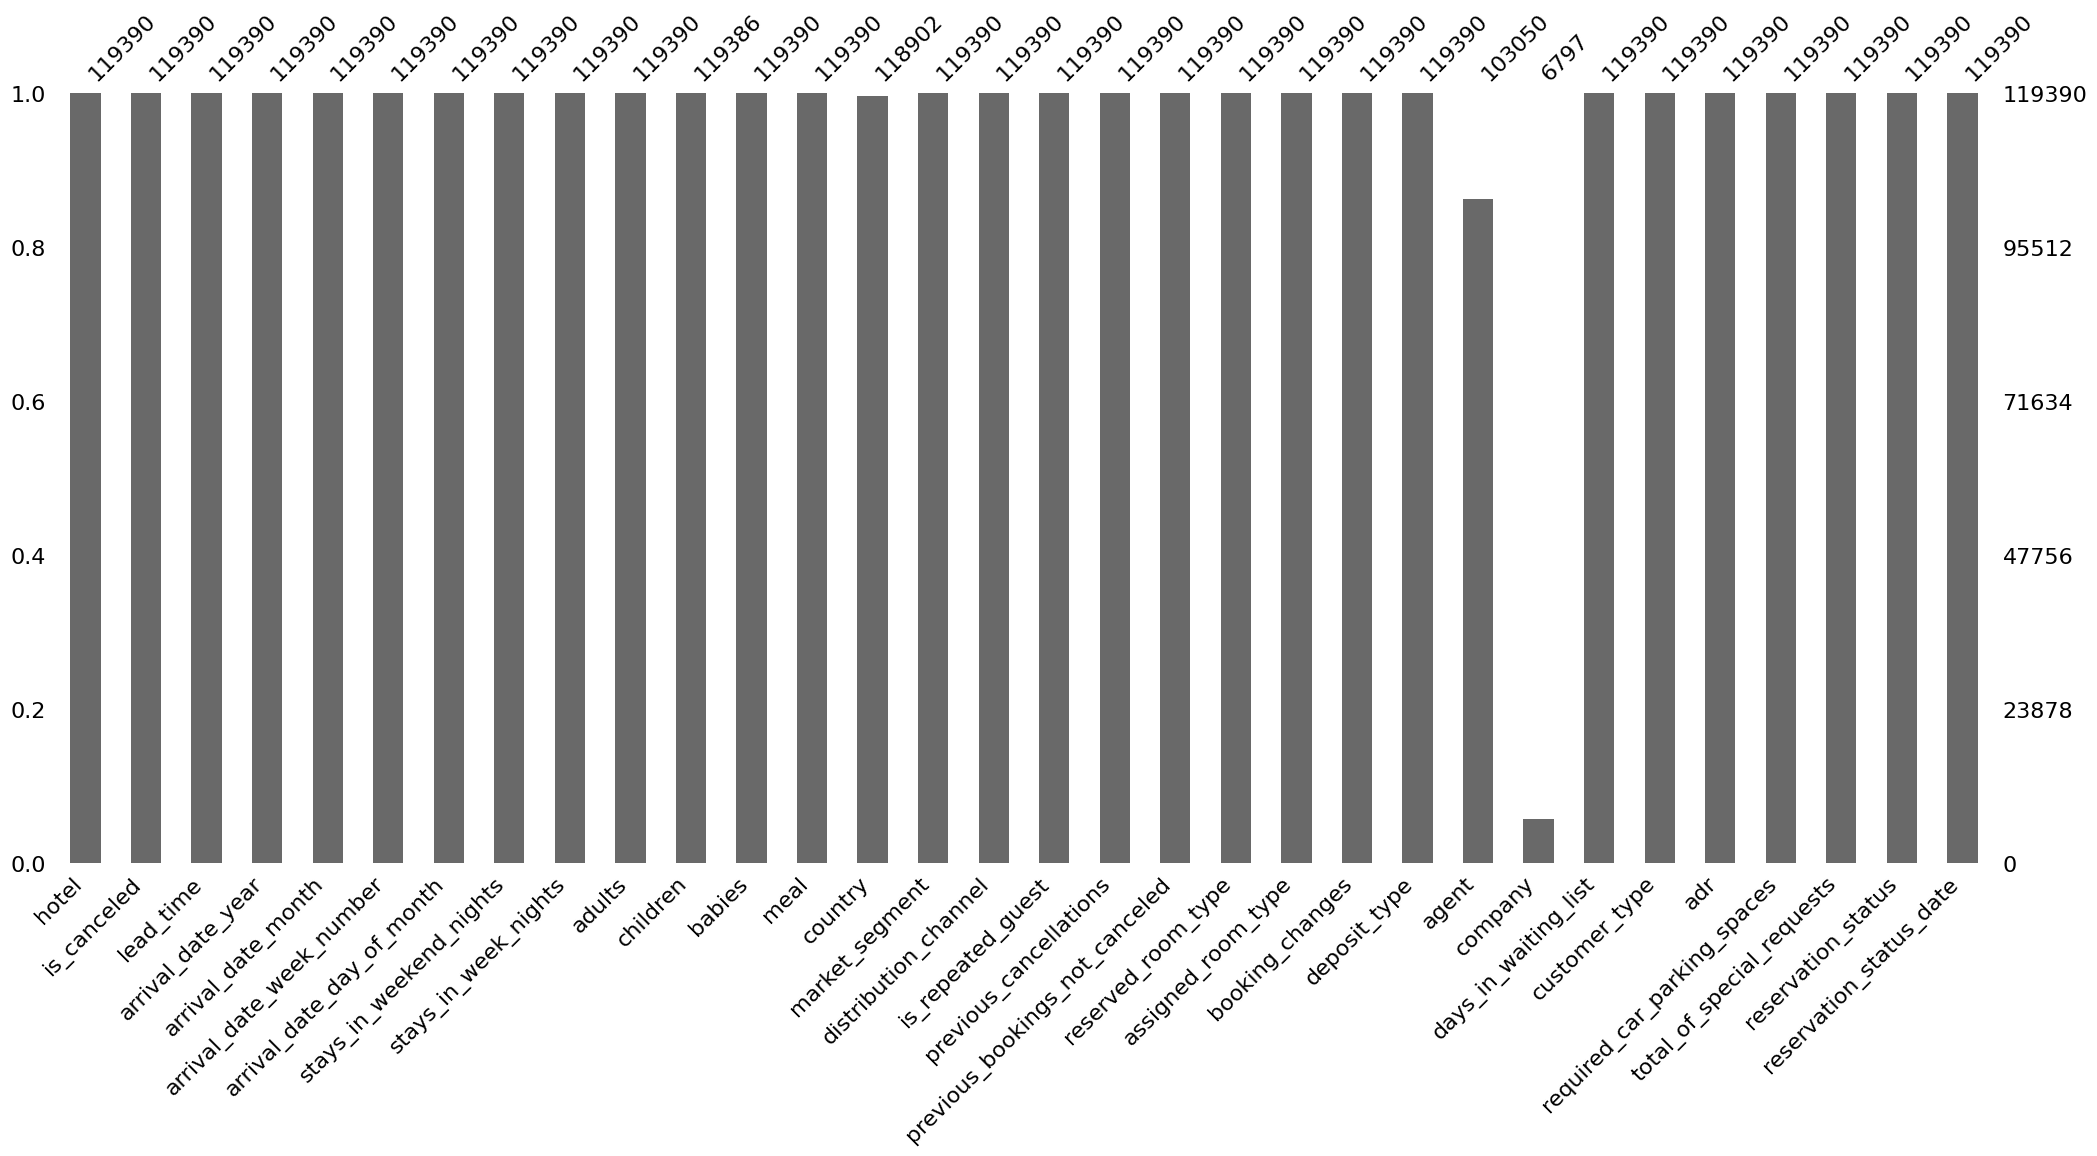

In [44]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values as a matrix
msno.matrix(df)
plt.show()

# Optional: bar chart of missing values per column
msno.bar(df)
plt.show()


In [45]:
def check_outliers(col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
  return outliers
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    outliers = check_outliers(col)
    print(f"Total number of {col} outliers: {outliers.count()}")

Total number of is_canceled outliers: 0
Total number of lead_time outliers: 3005
Total number of arrival_date_year outliers: 0
Total number of arrival_date_week_number outliers: 0
Total number of arrival_date_day_of_month outliers: 0
Total number of stays_in_weekend_nights outliers: 265
Total number of stays_in_week_nights outliers: 3354
Total number of adults outliers: 29710
Total number of children outliers: 8590
Total number of babies outliers: 917
Total number of is_repeated_guest outliers: 3810
Total number of previous_cancellations outliers: 6484
Total number of previous_bookings_not_canceled outliers: 3620
Total number of booking_changes outliers: 18076
Total number of agent outliers: 0
Total number of company outliers: 0
Total number of days_in_waiting_list outliers: 3698
Total number of adr outliers: 3793
Total number of required_car_parking_spaces outliers: 7416
Total number of total_of_special_requests outliers: 2877


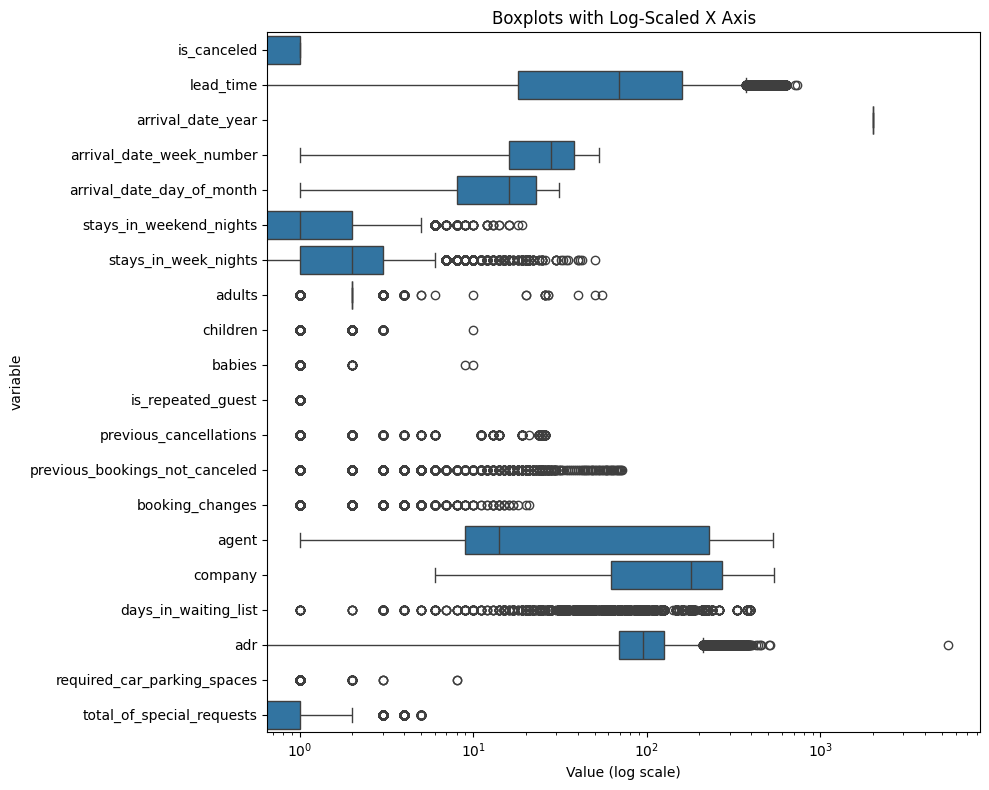

In [46]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
melted = df[numeric_cols].melt(var_name='variable', value_name='value')

plt.figure(figsize=(10, max(6, 0.4*len(numeric_cols))))
sns.boxplot(data=melted, x='value', y='variable', orient='h')
plt.xscale('log')
plt.xlabel('Value (log scale)')
plt.title('Boxplots with Log-Scaled X Axis')
plt.tight_layout()
plt.show()

# Findings

## 1. Missing Values

children → 4 missing values.

country → 488 missing values.

agent → large proportion missing (only 103,050 non-null, ~14% missing).

company → very sparse (only 6,797 non-null, ~94% missing).

📊 Visualization (using missingno or heatmap) confirms that company and agent are the columns with the heaviest missingness, while others are mostly complete.

## 2. Outliers (numeric columns)

adr (Average Daily Rate):

Boxplots show extreme outliers with very high values (some > 5,000, which is unrealistic for hotel daily rates).

Likely due to data entry errors or exceptional cases.

lead_time:

Majority of bookings have lead time < 365 days, but there are some extreme outliers (lead time > 700 days).

These may represent data errors or unusual long-term reservations.

Outliers were detected using both boxplots and the IQR method.

## 3. Data Types

reservation_status_date should be converted from object → datetime.

Categorical columns like arrival_date_month, meal, deposit_type, customer_type, reservation_status are correctly stored as object but should be encoded later for ML models.

## 4. General Data Quality Issues

High missingness in company and moderate missingness in agent → might need to be dropped or imputed.

Minor missingness in children and country → imputation or removal of few rows is possible.

Outliers in adr and lead_time could distort model training and should be capped/removed.

Inconsistent categorical labels (e.g., different spellings of country codes or meal categories) may need cleaning.

Date handling: reservation_status_date should be parsed into datetime for analysis.

In [47]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#  Phase 2: Data Cleaning (The Core of the Project)

In [48]:
df["company"].fillna("None", inplace=True)
df["agent"].fillna("None", inplace=True)
df["country"].fillna(df["country"].mode()[0], inplace=True)
df["children"].fillna(df["children"].mode()[0], inplace=True)

/tmp/ipython-input-350138026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["company"].fillna("None", inplace=True)
/tmp/ipython-input-350138026.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["company"].fillna("None", inplace=True)
/tmp/ipython-input-350138026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame o

In [49]:
df.drop_duplicates(inplace = True)

In [50]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # cap values
    df[col] = np.where(df[col] > upper_bound, upper_bound,
                       np.where(df[col] < lower_bound, lower_bound, df[col]))
    return df

# Apply capping to all numeric columns
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    df = cap_outliers(df, col)

# Quick check
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.000000,87377.0,87377.0,87377.0,87377.0,87377.0,87377.0,87377.0,87377.0,87377.000000,87377.0,87377.000000
mean,0.274946,78.378143,2016.210273,26.840107,15.815203,0.999268,2.577332,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.353743,0.0,0.678840
std,0.446490,81.049855,0.686124,13.673425,8.834744,0.994387,1.807483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.184345,0.0,0.776559
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.380000,0.0,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.000000,0.0,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.100000,0.0,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.000000,0.0,1.000000
max,1.000000,296.000000,2017.000000,53.000000,31.000000,5.000000,8.500000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227.000000,0.0,2.500000


In [51]:
df.dtypes

,0
hotel,object
is_canceled,float64
lead_time,float64
arrival_date_year,float64
arrival_date_month,object
arrival_date_week_number,float64
arrival_date_day_of_month,float64
stays_in_weekend_nights,float64
stays_in_week_nights,float64
adults,float64


In [52]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

 # Phase 3: Feature Engineering & Preprocessing


In [53]:
df["total_guests"] = df["adults"] + df["children"] + df["babies"]
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["is_family"] = np.where((df["children"] > 0) | (df["babies"] > 0), "Yes", "No")

In [54]:

low_cardinality = ["meal", "market_segment"]
df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

country_freq = df['country'].value_counts(normalize=True)
df['country_encoded'] = df['country'].map(country_freq)

threshold = 200
top_countries = df['country'].value_counts()[df['country'].value_counts() >= threshold].index

df['country_grouped'] = df['country'].apply(lambda x: x if x in top_countries else "Other")
df_encoded = pd.get_dummies(df, columns=["country_grouped"], drop_first=True)



In [55]:
 df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,country_encoded,country_grouped
0,Resort Hotel,0.0,296.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,False,False,False,True,False,False,False,False,0.319146,PRT
1,Resort Hotel,0.0,296.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,False,False,False,True,False,False,False,False,0.319146,PRT
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,2.0,...,False,False,False,True,False,False,False,False,0.119402,GBR
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,2.0,...,False,False,True,False,False,False,False,False,0.119402,GBR
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,False,False,False,False,False,False,True,False,0.119402,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0.0,23.0,2017.0,August,35.0,30.0,2.0,5.0,2.0,...,False,False,False,False,False,True,False,False,0.023816,BEL
119386,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,False,False,False,False,False,False,True,False,0.101136,FRA
119387,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,False,False,False,False,False,False,True,False,0.061652,DEU
119388,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,False,False,False,False,False,False,True,False,0.119402,GBR


In [56]:
df.drop(["reservation_status","reservation_status_date"],axis=1,inplace=True)

In [58]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2,random_state=42)